In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Home

In [2]:
# The starter code is short and simple, take a look!
from starter import *
import random
import numpy
import math
from collections import defaultdict

# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    G.add_nodes_from(range(N_SMALL))
    num_edges = 0
    sum_weight = 500000
    unlucky_nodes = [20, 21, 22]
    while sum_weight >= 0:
        weight = random.randint(0, 1000)
        node1 = random.randint(0, N_SMALL-1)
        node2 = random.randint(0, N_SMALL-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    G.add_nodes_from(range(N_MEDIUM))
    num_edges = 0
    sum_weight = 750000
    unlucky_nodes = [20, 200, 210, 222]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_MEDIUM-1)
        node2 = random.randint(0, N_MEDIUM-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    G.add_nodes_from(range(N_LARGE))
    num_edges = 0
    sum_weight = 1000000
    unlucky_nodes = [i for i in range(N_LARGE) if i % 10 == 2]
    while sum_weight >= 0:
        weight = random.randint(1, 1000)
        node1 = random.randint(0, N_LARGE-1)
        node2 = random.randint(0, N_LARGE-1)
        if node1 != node2 and node1 not in unlucky_nodes and node2 not in unlucky_nodes:
            if not (node1, node2) in G.edges([node1, node2]) and num_edges <= MAX_EDGES:
                G.add_edge(node1, node2, weight=weight)
                sum_weight -= weight
                num_edges += 1
            else:
                old_weight = G.edges[node1, node2]['weight']
                sum_weight -= min(weight, 1000 - old_weight)
                weight = min(1000, weight + old_weight)
                G.edges[node1, node2]['weight'] = weight
    return G

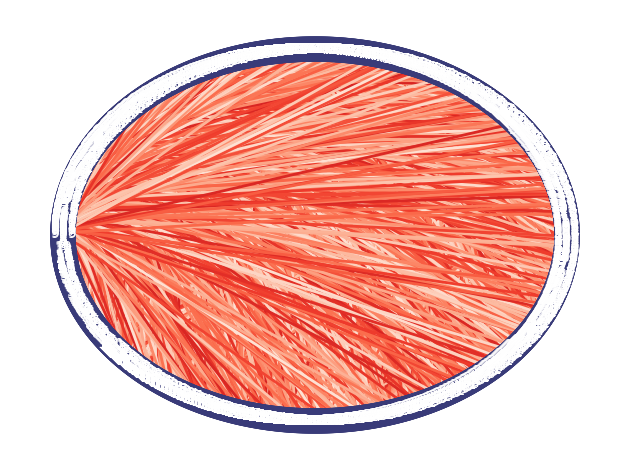

In [4]:
'''G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')
visualize(G)

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')
visualize(G)

'''
G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')
visualize(G)

# Phase 2 - Implement your Solver

In [5]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    def getWeight(pair):
        u,v = pair
        return G[u][v]['weight']
    edges = sorted(list(G.edges), key=getWeight, reverse=False)
    num_vertices = len(G.nodes)
    for node in G.nodes:
        G.nodes[node]['team'] = 1
        
    def helper(G):
        overall_best_copy = G.copy()
        overall_best_score = float('inf')
        best_score = float('inf')
        counter = 0 # num of times that we haven't updated the overall_best_score
        for k in range(2, num_vertices):
            counter += 1
            # start with all penguins in random teams
            for node in G.nodes:
                G.nodes[node]['team'] = random.randint(1,k)
            s = score(G)
            if s > overall_best_score * 10 or counter > 3:
                break
            best_copy = G.copy()
            best_score = s
            for _ in range(len(G.nodes)):
                modified = False
                for u, v in edges:
                    if G.nodes[u]['team'] == G.nodes[v]['team']:
                        # repeteatedly, randomly pick new teams, and use the best assignment
                        for i in range(min(k-1,math.ceil(3000/num_vertices))):
                            old_score = s
                            old_u_team = G.nodes[u]['team']
                            old_v_team = G.nodes[v]['team']
                            new_u_team = random.choice(list(range(1,old_u_team)) + list(range(old_u_team+1,k+1)))
                            new_v_team = random.choice(list(range(1,old_v_team)) + list(range(old_v_team+1,k+1)))

                            G.nodes[u]['team'] = new_u_team # u changed
                            new_u_score = score(G)
                            G.nodes[v]['team'] = new_v_team # u,v changed
                            new_uv_score = score(G)
                            G.nodes[u]['team'] = old_u_team # v changed
                            new_v_score = score(G)

                            # get the minimum score
                            s = min(old_score, new_u_score, new_uv_score, new_v_score)
                            change = []
                            if s == old_score: # neither changes
                                G.nodes[v]['team'] = old_v_team
                            else:
                                modified = True
                                if s == new_u_score: # u changes
                                    G.nodes[u]['team'] = new_u_team
                                    G.nodes[v]['team'] = old_v_team
                                    change = [(u, new_u_team)]
                                elif s == new_uv_score: # u,v changes
                                    G.nodes[u]['team'] = new_u_team
                                    change = [(u, new_u_team), (v, new_v_team)]
                                else: # else v changes
                                    change = [(v, new_v_team)]
                            if s < best_score:
                                best_score = s
                                # print(best_score)
                                for node, new_team in change:
                                    best_copy.nodes[node]['team'] = new_team
                if not modified:
                    break
                if best_score < overall_best_score:
                    counter = 0
                    overall_best_score = best_score
                    overall_best_copy = best_copy.copy()
                    # print(overall_best_score, 'best')
                    
        for node in G.nodes:
            G.nodes[node]['team'] = overall_best_copy.nodes[node]['team']
        #return best_copy, best_score
    
    '''for _ in range(1): # repeat to get best result
        b_copy, b_score = helper(G)
        if b_score < overall_best_score:
            overall_best_copy = b_copy.copy()
            overall_best_score = b_score
    for node in G.nodes:
        G.nodes[node]['team'] = overall_best_copy.nodes[node]['team']'''
    helper(G)

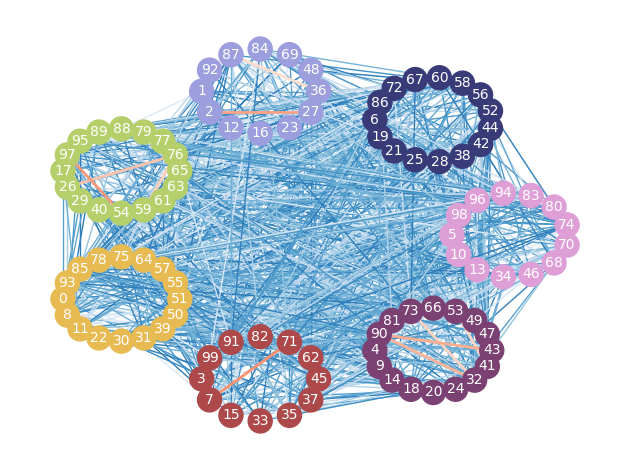

7403.088375761406

In [6]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

run(solve, 'small.in', 'small.out')

In [7]:
in_dir = 'inputs'
out_dir = 'outputs' # or whatever you named the outputs folder to be
lst = [x for x in os.listdir(in_dir) if x.endswith('.in')]
lst = lst[200:390] # whatever ranges you want to run in this copy
for file in tqdm(lst):
    p = str(Path(out_dir) / f"{file[:-len('.in')]}.out")
    if not os.path.exists(p):
        run(solve, str(Path(in_dir) / file), str(Path(out_dir) / f"{file[:-len('.in')]}.out"), False)
    else:
        print(p + " already exists")

  0%|          | 0/190 [00:00<?, ?it/s]

outputs/small168.out already exists
inputs/medium214.in: cost 27103.30779981041
inputs/medium185.in: cost 32520.197500174734
inputs/large229.in: cost 450.21543994492924


KeyboardInterrupt: 